In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 1: Standford Open Policing Project

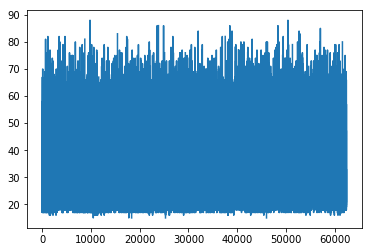

In [42]:
ri=pd.read_csv("Police.csv")
ted=pd.read_csv("ted.csv")
ri.driver_age.plot()

In [4]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
ri.shape

(62359, 15)

In [6]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           62359
driver_gender          3888
driver_age_raw         3881
driver_age             4133
driver_race            3887
violation_raw          3887
violation              3887
search_conducted          1
search_type           59973
stop_outcome           3887
is_arrested            3887
stop_duration          3887
drugs_related_stop        1
dtype: int64

In [73]:
ri.isnull().head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [12]:
True ==1

True

In [13]:
False ==0

True

## 1. Remove the column that only contains missing values

In [36]:
#ri.drop(columns="county_name",inplace=True)
ri.drop('county_name',axis='columns',inplace=True)


In [37]:
ri.shape

(62359, 14)

In [38]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [41]:
ri.dropna(axis='columns',how='all').shape #Second Method

(62359, 14)

In [43]:
del ri['county_name'] #Third Method

In [44]:
ri.shape

(62359, 14)

## 2. Do men or women speed more often?

In [45]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [51]:
ri[ri.violation=='Speeding'].groupby("driver_gender").driver_gender.value_counts() #First way

driver_gender  driver_gender
F              F                11198
M              M                24644
Name: driver_gender, dtype: int64

In [52]:
ri[ri.violation=='Speeding'].driver_gender.value_counts() # Second_way

M    24644
F    11198
Name: driver_gender, dtype: int64

In [54]:
ri[ri.violation=='Speeding'].driver_gender.value_counts(normalize=True) # Incase of percentage

M    0.687573
F    0.312427
Name: driver_gender, dtype: float64

In [55]:
ri[ri.driver_gender=='M'].violation.value_counts(normalize=True) # Another way to understand this question

Speeding               0.572717
Moving violation       0.212526
Equipment              0.108599
Other                  0.070579
Registration/plates    0.035580
Name: violation, dtype: float64

In [56]:
ri[ri.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.725212
Moving violation       0.127323
Equipment              0.080889
Registration/plates    0.038534
Other                  0.028042
Name: violation, dtype: float64

In [57]:
ri.groupby(ri.driver_gender).violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.725212
               Moving violation       0.127323
               Equipment              0.080889
               Registration/plates    0.038534
               Other                  0.028042
M              Speeding               0.572717
               Moving violation       0.212526
               Equipment              0.108599
               Other                  0.070579
               Registration/plates    0.035580
Name: violation, dtype: float64

In [58]:
ri.groupby(ri.driver_gender).violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.725212
M    0.572717
Name: violation, dtype: float64

In [59]:
ri.groupby(ri.driver_gender).violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
driver_gender,,,,,
F,0.080889,0.127323,0.028042,0.038534,0.725212
M,0.108599,0.212526,0.070579,0.035580,0.572717


## 3. does gender affect who get searched during a stop?

In [60]:
ri.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [62]:
ri.groupby(ri.driver_gender).search_conducted.value_counts(normalize=True).unstack()

search_conducted,False,True
driver_gender,,
F,0.976944,0.023056
M,0.952824,0.047176


In [63]:
ri.search_conducted.value_counts(normalize=True)

False    0.961737
True     0.038263
Name: search_conducted, dtype: float64

In [65]:
ri.search_conducted.mean() # Same result as earlier

0.03826293338464992

In [70]:
#ri.groupby('driver_gender').search_conducted.mean() #don't know why this is not working. this working with earlier versions

In [71]:
ri.groupby([ri.driver_gender,ri.violation]).search_conducted.value_counts(normalize=True).unstack()

search_conducted                      False     True 
driver_gender violation                              
F             Equipment            0.937550  0.062450
              Moving violation     0.953204  0.046796
              Other                0.939954  0.060046
              Registration/plates  0.897479  0.102521
              Speeding             0.991159  0.008841
M             Equipment            0.906484  0.093516
              Moving violation     0.937343  0.062657
              Other                0.956207  0.043793
              Registration/plates  0.856956  0.143044
              Speeding             0.972894  0.027106

In [72]:
ri.groupby([ri.driver_gender,ri.violation]).search_conducted.mean() #NotWoking

DataError: No numeric types to aggregate

## Why is search_type missing so often?


In [75]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          3888
driver_age_raw         3881
driver_age             4133
driver_race            3887
violation_raw          3887
violation              3887
search_conducted          1
search_type           59973
stop_outcome           3887
is_arrested            3887
stop_duration          3887
drugs_related_stop        1
dtype: int64

In [77]:
ri.search_conducted.value_counts() #it's conclude that search_type is missing whenever search_couducted is false

False    59972
True      2386
Name: search_conducted, dtype: int64

In [83]:
ri.search_type.value_counts()

Incident to Arrest                                          1053
Probable Cause                                               550
Inventory                                                    160
Reasonable Suspicion                                         136
Protective Frisk                                             126
Incident to Arrest,Inventory                                  97
Incident to Arrest,Probable Cause                             76
Probable Cause,Reasonable Suspicion                           35
Incident to Arrest,Protective Frisk                           31
Incident to Arrest,Inventory,Probable Cause                   25
Probable Cause,Protective Frisk                               23
Inventory,Probable Cause                                      13
Incident to Arrest,Inventory,Protective Frisk                 11
Incident to Arrest,Probable Cause,Protective Frisk            10
Inventory,Protective Frisk                                    10
Protective Frisk,Reasonab

In [81]:
ri[ri.search_conducted==False].search_type.value_counts() # Imp... NaN values dropped by default before counting 

Series([], Name: search_type, dtype: int64)

In [82]:
ri[ri.search_conducted==False].search_type.value_counts(dropna=False) # Use this to not drop NaN before counting

NaN    59972
Name: search_type, dtype: int64

## 5. During a search, how often is the driver frisked?

In [84]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [91]:
ri[ri.search_type.str.contains('Frisk', case=False)==True]['search_conducted'].value_counts()

True    224
Name: search_conducted, dtype: int64

In [95]:
ri[ri.search_conducted==True].ri.search_type.str.contains('Frisk', case=False).sum()

AttributeError: 'DataFrame' object has no attribute 'ri'

In [96]:
ri['frisk']=ri.search_type.str.contains('Frisk')

In [99]:
ri.frisk.value_counts(dropna=False) #This works Better

NaN      59973
False     2162
True       224
Name: frisk, dtype: int64

In [100]:
ri.frisk.sum()

224

In [101]:
ri.frisk.mean()

0.09388097233864208

## 6. Which year had the least number of stop

In [102]:
ri.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [107]:
type(ri)

pandas.core.frame.DataFrame

In [111]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62359 entries, 0 to 62358
Data columns (total 15 columns):
stop_date             62359 non-null object
stop_time             62359 non-null object
driver_gender         58471 non-null object
driver_age_raw        58478 non-null float64
driver_age            58226 non-null float64
driver_race           58472 non-null object
violation_raw         58472 non-null object
violation             58472 non-null object
search_conducted      62358 non-null object
search_type           2386 non-null object
stop_outcome          58472 non-null object
is_arrested           58472 non-null object
stop_duration         58472 non-null object
drugs_related_stop    62358 non-null object
frisk                 2386 non-null object
dtypes: float64(2), object(13)
memory usage: 7.1+ MB


In [118]:
ri['year']=ri.stop_date.dt.year

In [120]:
ri.year.value_counts().tail(1)

2005    2558
Name: year, dtype: int64

In [123]:
ri.stop_date.apply(str).str.slice(0,4) # Another way but it won't work with panda date type only work with string so first i am 
# converting this back to string

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
62329    2012
62330    2012
62331    2012
62332    2012
62333    2012
62334    2012
62335    2012
62336    2012
62337    2012
62338    2012
62339    2012
62340    2012
62341    2012
62342    2012
62343    2012
62344    2012
62345    2012
62346    2012
62347    2012
62348    2012
62349    2012
62350    2012
62351    2012
62352    2012
62353    2012
62354    2012
62355    2012
62356    2012
62357    2012
62358    2012
Name: stop_date, Length: 62359, dtype: object

In [124]:
ri.stop_date.apply(str).str.slice(0,4).value_counts()

2006    10639
2007     9476
2008     8752
2011     8126
2009     7908
2010     7561
2012     7339
2005     2558
Name: stop_date, dtype: int64

In [126]:
ri.stop_date.apply(str).str.slice(0,4).value_counts(normalize=True)

2006    0.170609
2007    0.151959
2008    0.140349
2011    0.130310
2009    0.126814
2010    0.121250
2012    0.117690
2005    0.041021
Name: stop_date, dtype: float64

In [132]:
combined=ri.stop_date.apply(str).str.cat(ri.stop_time, sep=' ')
combined.head()

0    2005-01-02 00:00:00 01:55
1    2005-01-18 00:00:00 08:15
2    2005-01-23 00:00:00 23:15
3    2005-02-20 00:00:00 17:15
4    2005-03-14 00:00:00 10:00
Name: stop_date, dtype: object

In [135]:
ri['stop_date_time']=pd.to_datetime(combined)

In [136]:
ri.stop_date_time.dt.time.head()

0    01:55:00
1    08:15:00
2    23:15:00
3    17:15:00
4    10:00:00
Name: stop_date, dtype: object

In [137]:
ri.stop_date_time.dt.weekday.head()

0    6
1    1
2    6
3    6
4    0
Name: stop_date, dtype: int64

## 7. How does drug activity change by time of day?

In [138]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year,stop_date_time
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-03-14 10:00:00


In [139]:
ri.search_type.value_counts()

Incident to Arrest                                          1053
Probable Cause                                               550
Inventory                                                    160
Reasonable Suspicion                                         136
Protective Frisk                                             126
Incident to Arrest,Inventory                                  97
Incident to Arrest,Probable Cause                             76
Probable Cause,Reasonable Suspicion                           35
Incident to Arrest,Protective Frisk                           31
Incident to Arrest,Inventory,Probable Cause                   25
Probable Cause,Protective Frisk                               23
Inventory,Probable Cause                                      13
Incident to Arrest,Inventory,Protective Frisk                 11
Incident to Arrest,Probable Cause,Protective Frisk            10
Inventory,Protective Frisk                                    10
Protective Frisk,Reasonab

In [148]:
ri[ri.drugs_related_stop==True].stop_date_time.dt.hour.value_counts()


0     78
23    68
1     41
22    31
2     30
13    27
14    22
18    19
11    18
20    18
19    17
10    16
15    16
9     13
16    13
21    13
3     11
12    10
7      8
6      7
17     7
8      5
4      2
5      1
Name: stop_date_time, dtype: int64

In [150]:
ri.drugs_related_stop.mean()


0.007873889476891497

In [155]:
ri['drugs_related_stop']=ri.drugs_related_stop.apply(bool)

In [158]:
ri.groupby(ri.stop_date_time.dt.hour).drugs_related_stop.mean()

AttributeError: 'Series' object has no attribute 'sort'

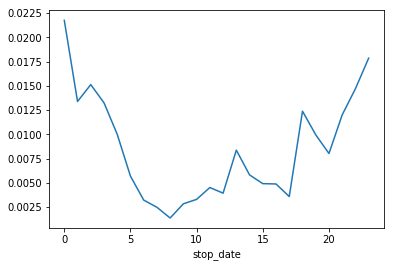

In [160]:
ri.groupby(ri.stop_date_time.dt.hour).drugs_related_stop.mean().plot()

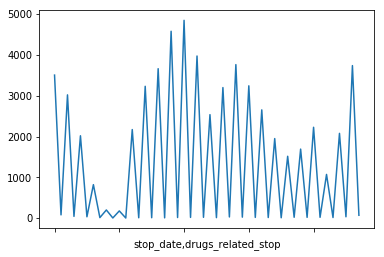

In [162]:
ri.groupby(ri.stop_date_time.dt.hour).drugs_related_stop.value_counts().plot()

## 8. Do the most stops ocure at night?

In [163]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year,stop_date_time
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005,2005-03-14 10:00:00


In [173]:
ri[(ri.stop_date_time.dt.hour>7) & (ri.stop_date_time.dt.hour<18)].value()

driver_age_raw        64101303.0
driver_age             1139078.0
drugs_related_stop         147.0
year                  69414817.0
dtype: float64

In [175]:
ri.groupby((ri.stop_date_time.dt.hour>7) & (ri.stop_date_time.dt.hour<18))['']

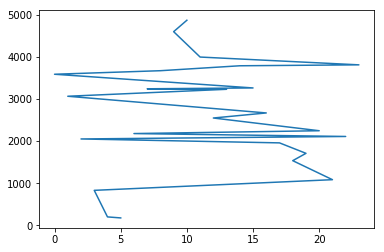

In [176]:
ri.stop_date_time.dt.hour.value_counts().plot()

In [177]:
ri.stop_date_time.dt.hour.value_counts().sort_values()

5      176
4      200
3      830
21    1083
18    1534
19    1708
17    1956
2     2049
22    2108
6     2177
20    2244
12    2546
16    2666
1     3062
13    3227
7     3239
15    3259
0     3584
8     3668
14    3785
23    3807
11    3992
9     4594
10    4865
Name: stop_date, dtype: int64

In [178]:
ri.stop_date_time.dt.hour.value_counts().sort_index()

0     3584
1     3062
2     2049
3      830
4      200
5      176
6     2177
7     3239
8     3668
9     4594
10    4865
11    3992
12    2546
13    3227
14    3785
15    3259
16    2666
17    1956
18    1534
19    1708
20    2244
21    1083
22    2108
23    3807
Name: stop_date, dtype: int64

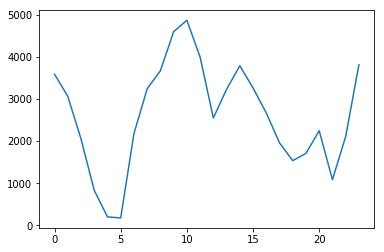

In [179]:
ri.stop_date_time.dt.hour.value_counts().sort_index().plot()

In [180]:
ri[(ri.stop_date_time.dt.hour>4) & (ri.stop_date_time.dt.hour<22)].shape

(46719, 17)

In [181]:
ri.shape

(62359, 17)

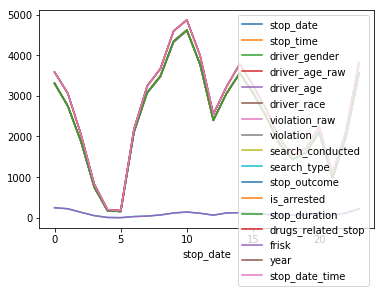

In [182]:
ri.groupby(ri.stop_date_time.dt.hour).count().plot()

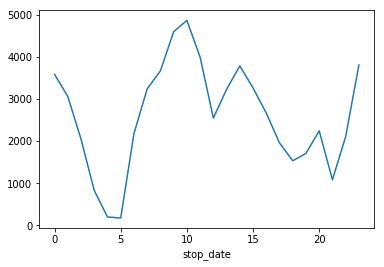

In [183]:
ri.groupby(ri.stop_date_time.dt.hour).stop_date.count().plot()

### Use Map to solve this

## 9. Find bad data in the stop_duration column and fix it

In [184]:
ri.stop_duration.value_counts()

0-15 Min     44739
16-30 Min    11161
30+ Min       2571
2                1
Name: stop_duration, dtype: int64

In [185]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     44739
16-30 Min    11161
NaN           3887
30+ Min       2571
2                1
Name: stop_duration, dtype: int64

In [186]:
ri[ri.stop_duration.isnull()] # Not looking bad data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year,stop_date_time
25,2005-09-03,16:02,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-09-03 16:02:00
29,2005-09-26,01:05,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-09-26 01:05:00
52,2005-10-01,13:09,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-01 13:09:00
110,2005-10-03,19:50,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-03 19:50:00
124,2005-10-04,11:43,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-04 11:43:00
150,2005-10-05,10:08,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-05 10:08:00
205,2005-10-07,09:09,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-07 09:09:00
226,2005-10-08,03:13,NaN,1968.0,37.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-08 03:13:00
314,2005-10-11,10:30,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-11 10:30:00
318,2005-10-11,15:20,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,2005,2005-10-11 15:20:00


In [188]:
 ri[ri.stop_duration=='2'] # looks like misstyped data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,year,stop_date_time
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,NaN,2012,2012-01-23 11:17:00


In [191]:
ri[ri.stop_duration=='2']=NaN

NameError: name 'NaN' is not defined

In [192]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     44739
16-30 Min    11161
NaN           3887
30+ Min       2571
NaN              1
Name: stop_duration, dtype: int64

In [197]:
import numpy as np
ri.loc[ri.stop_duration=='NaN','stop_duration']= np.nan

In [198]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     44739
16-30 Min    11161
NaN           3888
30+ Min       2571
Name: stop_duration, dtype: int64